### Free Parking Space

In [1]:
!nvidia-smi

Mon Nov  3 06:45:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp "/content/gdrive/MyDrive/00 Bachelor's Degree/4th Year (AY2526)/First Semester (2526A)/CS 176/02 Projects/Mini Project 2/data.zip" /content

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[Image Dataset](https://universe.roboflow.com/models/object-detection)

In [7]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/custom_data

In [8]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-11-03 06:50:45--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-11-03 06:50:45 (62.0 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Number of image files: 494
Number of annotation files: 494
Images moving to train: 444
Images moving to validation: 50


In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.7 MB/s eta 0:00:00


In [10]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 2
names:
- empty
- occupied


In [11]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj

In [12]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/50 /content/data/validation/images/2022-11-15-14-07-04_mp4-1_jpg.rf.2519c6b1b518a8f5f41d4491bd4e2c69.jpg: 640x640 14 emptys, 5 occupieds, 15.4ms
image 2/50 /content/data/validation/images/2022-11-15-14-07-04_mp4-1_jpg.rf.5938899a567e246224a79ef4c8bbaad4.jpg: 640x640 14 emptys, 5 occupieds, 15.3ms
image 3/50 /content/data/validation/images/2022-11-15-14-07-04_mp4-21_jpg.rf.688dc9453bcfeb0b9551cf911a67fc9c.jpg: 640x640 11 emptys, 5 occupieds, 15.2ms
image 4/50 /content/data/validation/images/2022-11-15-14-07-04_mp4-3_jpg.rf.7d43e8c567be00cfb4067388c52c2e73.jpg: 640x640 15 emptys, 5 occupieds, 15.2ms
image 5/50 /content/data/validation/images/2022-11-15-14-07-04_mp4-3_jpg.rf.97473fe11200e7f0ede233773c3764bd.jpg: 640x640 15 emptys, 5 occupieds, 15.3ms
image 6/50 /content/data/validation/images/2022-11-15-14-07-04_mp4

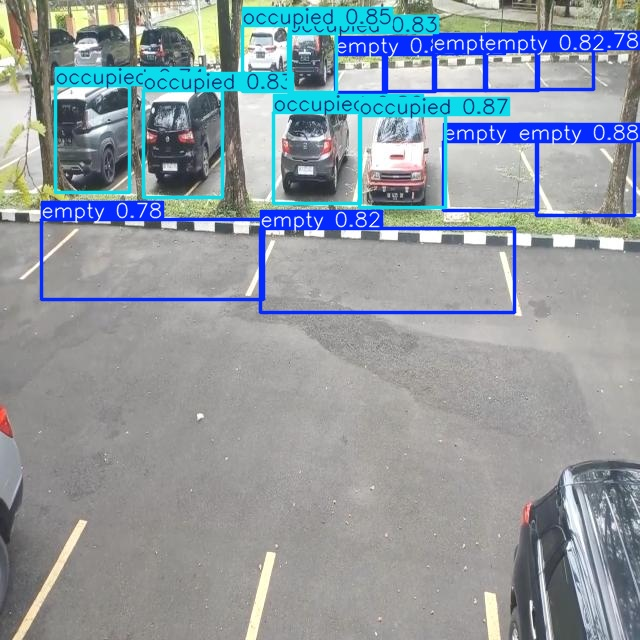

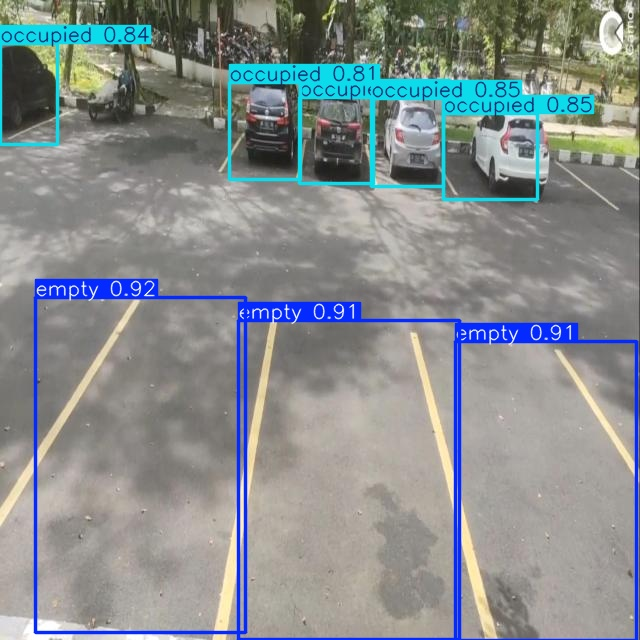

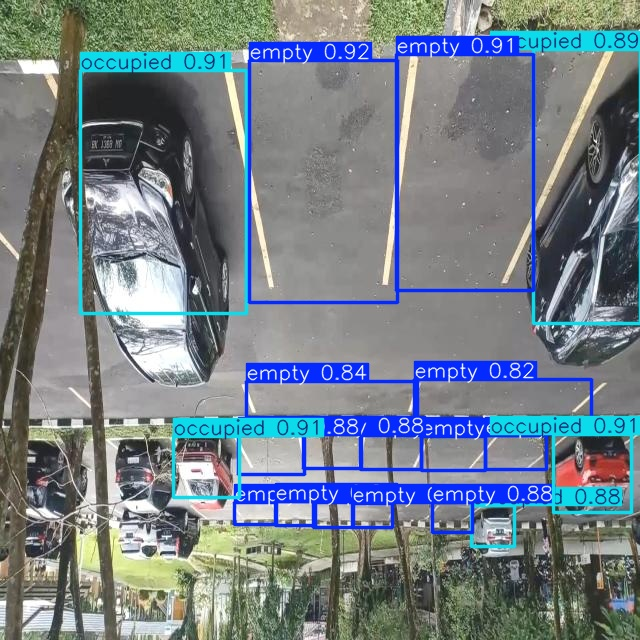

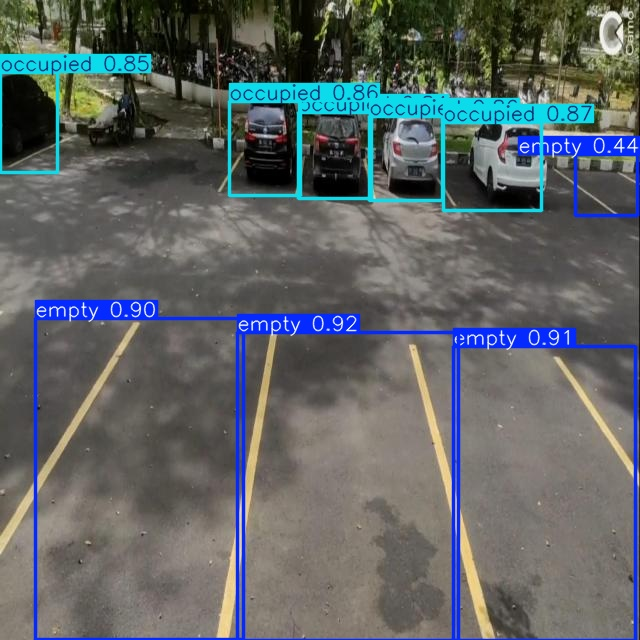

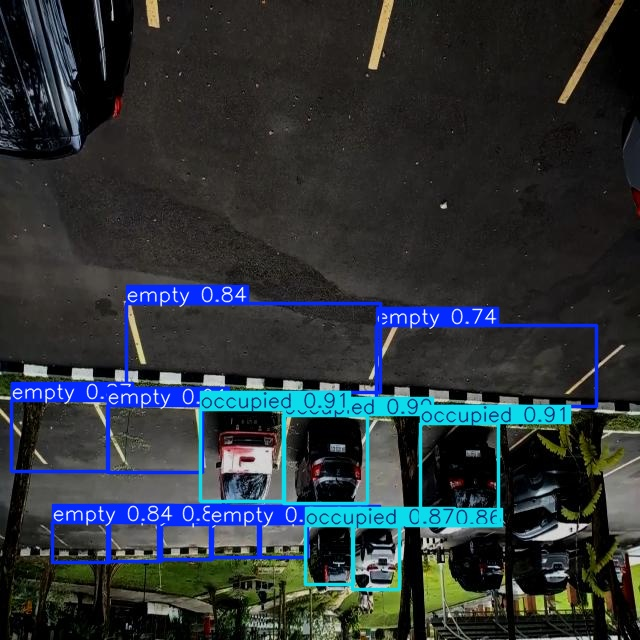

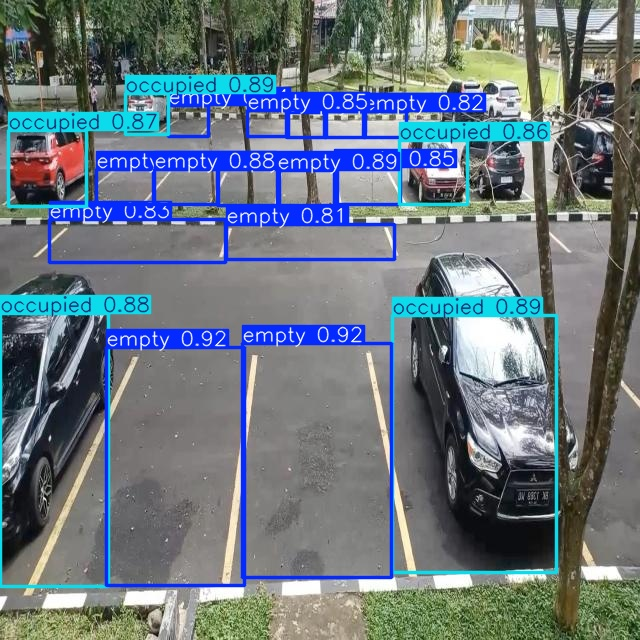

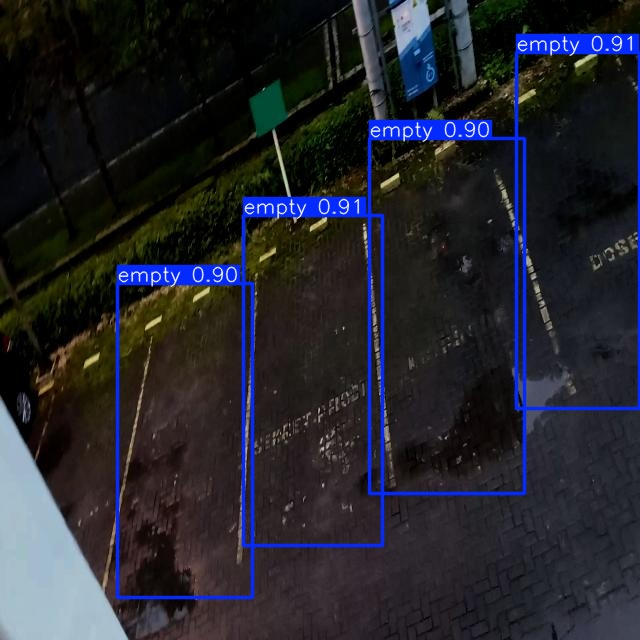

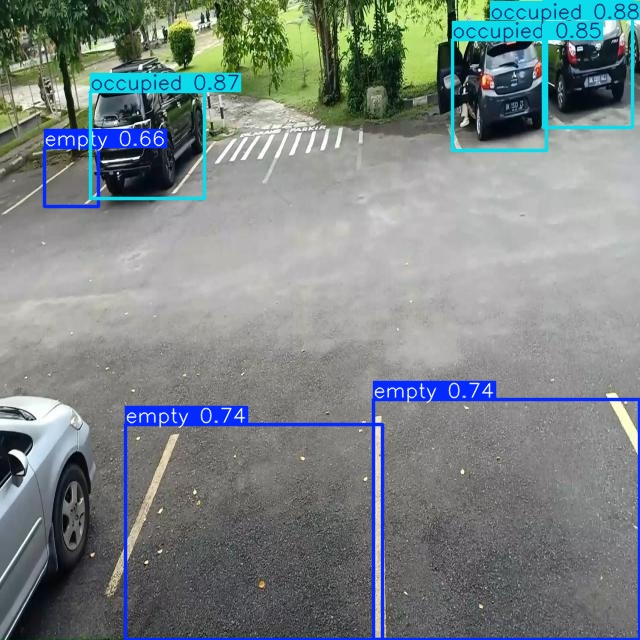

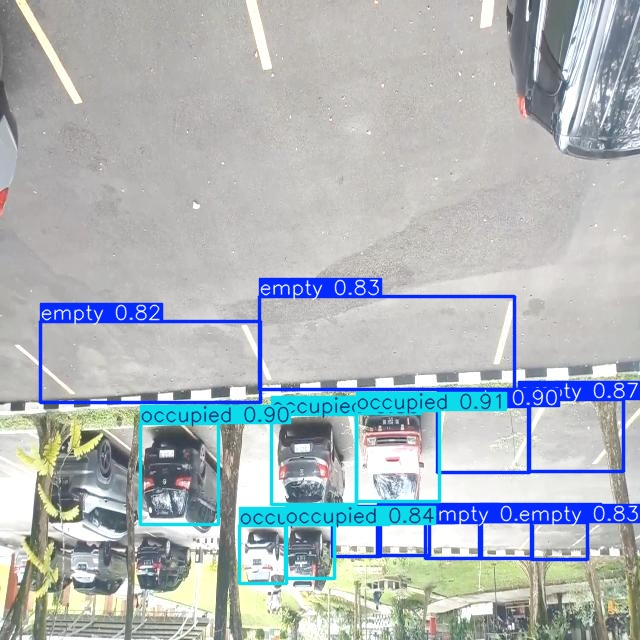

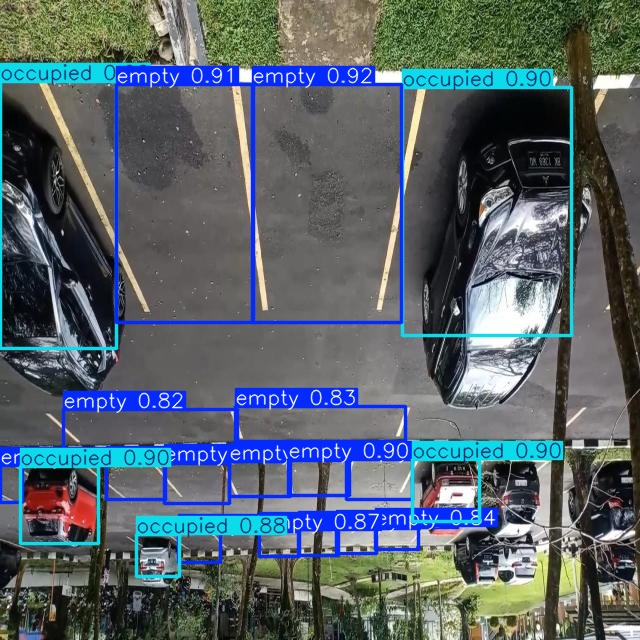

In [13]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [14]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/labels.jpg (deflated 31%)
  adding: train/train_batch1400.jpg (deflated 4%)
  adding: train/BoxP_curve.png (deflated 20%)
  adding: train/results.png (deflated 9%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/train_batch1401.jpg (deflated 5%)
  adding: train/confusion_matrix_normalized.png (deflated 31%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch1.jpg (deflated 3%)
  adding: train/BoxF1_curve.png (deflated 14%)
  adding: train/results.csv (deflated 62%)
  adding: train/val_batch1_labels.jpg (deflated 6%)
  adding: train/val_batch0_pred.jpg (deflated 4%)
  adding: train/confusion_matrix.png (deflated 33%)
  adding: train/BoxR_curve.png (deflated 15%)
  adding: train/train_batch2.jpg (deflated 1%)
  adding: train/val_batch1_pred.jpg (deflated 5%)
  adding: train/trai

In [15]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>